# Data Segmentation and Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('loan_analysis.csv')
df.head()

d:\anacondafiles\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,initial_list_status,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,Debt consolidation,5.91,0.0,675.0,679.0,1.0,30.0,2765.0,w,0.00,564.0,560.0,Individual,NaN,NaN
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,Business,16.06,1.0,715.0,719.0,4.0,6.0,21470.0,w,0.00,699.0,695.0,Individual,NaN,NaN
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,NaN,10.78,0.0,695.0,699.0,0.0,NaN,7869.0,w,0.00,704.0,700.0,Joint App,71000.0,13.85
3,66310712,35000.0,14.85,829.90,C,Information Systems Officer,MORTGAGE,110000.0,Current,debt_consolidation,Debt consolidation,17.06,0.0,785.0,789.0,0.0,NaN,7802.0,w,15897.65,679.0,675.0,Individual,NaN,NaN
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,Major purchase,25.37,1.0,695.0,699.0,3.0,12.0,21929.0,w,0.00,704.0,700.0,Individual,NaN,NaN


In [6]:
df.shape

(2260701, 25)

In [7]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [10]:
loan_int_df = df[df['loan_status'].isin(['Charged Off', 'Default', 'Fully Paid'])]

loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Charged Off', 'Default')
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Fully Paid', 'Good')

d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
loan_int_df['loan_status'].value_counts()

Good       1076751
Default     268599
Name: loan_status, dtype: int64

In [12]:
loan_int_df['last_fico_range_low'] = loan_int_df.apply(lambda x:x['fico_range_low'] if x['last_fico_range_low']==0.0 else x['last_fico_range_low'], axis=1)

d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
loan_int_df['last_fico_range_low'].value_counts().sort_index()

500.0     7639
505.0     8248
510.0     9370
515.0     9454
520.0    10837
         ...  
825.0     3536
830.0     2123
835.0     1046
840.0      570
845.0      255
Name: last_fico_range_low, Length: 70, dtype: int64

In [17]:
# IT WILL JUST DIVIDE THE "last_fico_range_low" INTO 5 BUCKETS 

pd.cut(loan_int_df['last_fico_range_low'], 5)

0          (499.655, 569.0]
1            (638.0, 707.0]
2            (638.0, 707.0]
4            (638.0, 707.0]
5            (707.0, 776.0]
                 ...       
2260688      (638.0, 707.0]
2260690      (707.0, 776.0]
2260691      (707.0, 776.0]
2260692      (638.0, 707.0]
2260697      (569.0, 638.0]
Name: last_fico_range_low, Length: 1345350, dtype: category
Categories (5, interval[float64]): [(499.655, 569.0] < (569.0, 638.0] < (638.0, 707.0] < (707.0, 776.0] < (776.0, 845.0]]

In [18]:
loan_int_df['fico_buckets'] = pd.cut(loan_int_df['last_fico_range_low'], 5, labels=['High Risky', 'Risky', 'Low Risk', 'Good', 'Excellent'])
loan_int_df['fico_buckets'].value_counts()

d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Low Risk      486877
Good          410367
Risky         181890
High Risky    159545
Excellent     106671
Name: fico_buckets, dtype: int64

In [23]:
loan_status_df = loan_int_df[['loan_status', 'fico_buckets']].groupby(['loan_status', 'fico_buckets']).agg({'fico_buckets':'count'})
loan_status_df

fico_buckets
loan_status fico_buckets              
Default     High Risky          122531
            Risky                87593
            Low Risk             50275
            Good                  7447
            Excellent              753
Good        High Risky           37014
            Risky                94297
            Low Risk            436602
            Good                402920
            Excellent           105918

In [24]:
loan_status_df.rename({'fico_buckets':'count'}, axis='columns').reset_index()

,loan_status,fico_buckets,count
0,Default,High Risky,122531
1,Default,Risky,87593
2,Default,Low Risk,50275
3,Default,Good,7447
4,Default,Excellent,753
5,Good,High Risky,37014
6,Good,Risky,94297
7,Good,Low Risk,436602
8,Good,Good,402920
9,Good,Excellent,105918


<AxesSubplot:xlabel='fico_buckets', ylabel='count'>

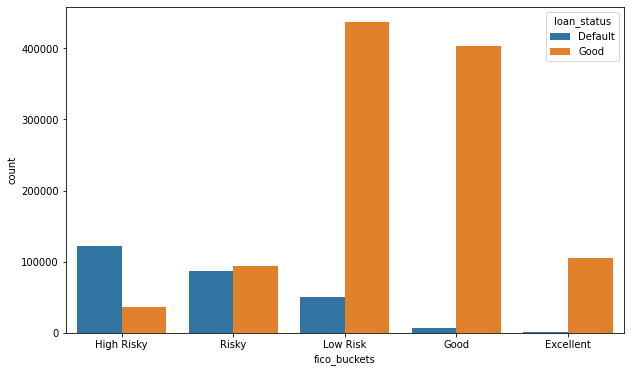

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='fico_buckets', y="count", hue="loan_status", data=loan_status_df.rename({'fico_buckets':'count'}, axis='columns').reset_index())

In [29]:
pd.qcut(loan_int_df['int_rate'], 5) # Quantile Cut ...basically it takes the data distribution into account then divides 

0          (13.98, 16.99]
1          (11.53, 13.98]
2            (8.9, 11.53]
4          (16.99, 30.99]
5          (11.53, 13.98]
                ...      
2260688      (8.9, 11.53]
2260690    (13.98, 16.99]
2260691    (13.98, 16.99]
2260692    (11.53, 13.98]
2260697    (13.98, 16.99]
Name: int_rate, Length: 1345350, dtype: category
Categories (5, interval[float64]): [(5.308999999999999, 8.9] < (8.9, 11.53] < (11.53, 13.98] < (13.98, 16.99] < (16.99, 30.99]]

In [30]:
loan_int_df['rate_buckets'] = pd.qcut(loan_int_df['int_rate'], 5, labels=['Low', 'Medium', 'High', 'Very High', 'Forget It'])

d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
loan_int_df['rate_buckets'].value_counts() # here the distribution is almost equal in all buckets bcoz of this quantile cut

Very High    273139
Medium       272760
Low          271425
Forget It    264015
High         264011
Name: rate_buckets, dtype: int64

In [35]:
loan_rate_df = loan_int_df[['loan_status', 'rate_buckets']].groupby(['loan_status', 'rate_buckets']).agg({'rate_buckets':'count'})
loan_rate_df

rate_buckets
loan_status rate_buckets              
Default     Low                  18211
            Medium               37629
            High                 49383
            Very High            68582
            Forget It            94794
Good        Low                 253214
            Medium              235131
            High                214628
            Very High           204557
            Forget It           169221

In [39]:
loan_rate_df.rename({'rate_buckets' : 'count'}, axis=1).reset_index()

,loan_status,rate_buckets,count
0,Default,Low,18211
1,Default,Medium,37629
2,Default,High,49383
3,Default,Very High,68582
4,Default,Forget It,94794
5,Good,Low,253214
6,Good,Medium,235131
7,Good,High,214628
8,Good,Very High,204557
9,Good,Forget It,169221


<AxesSubplot:xlabel='rate_buckets', ylabel='count'>

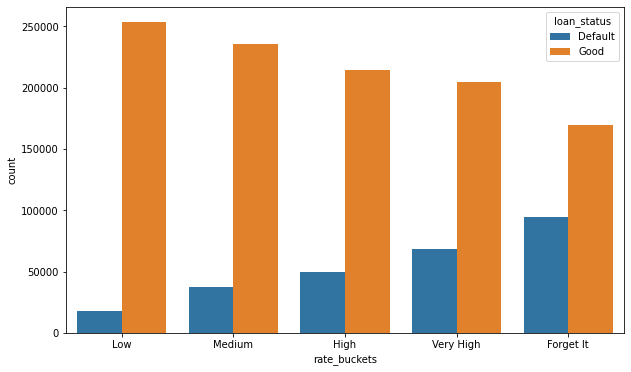

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='rate_buckets', y='count', hue='loan_status', data=loan_rate_df.rename({'rate_buckets' : 'count'}, axis=1).reset_index())

In [42]:
loan_int_df[['loan_status', 'rate_buckets', 'fico_buckets']].groupby(['fico_buckets','rate_buckets']).agg({'loan_status':'count'})

loan_status
fico_buckets rate_buckets             
High Risky   Low                 10416
             Medium              23026
             High                31397
             Very High           41805
             Forget It           52901
Risky        Low                 15862
             Medium              28950
             High                37684
             Very High           45843
             Forget It           53551
Low Risk     Low                 68116
             Medium             101195
             High               103708
             Very High          109326
             Forget It          104532
Good         Low                122429
             Medium              98046
             High                76888
             Very High           65969
             Forget It           47035
Excellent    Low                 54602
             Medium              21543
             High                14334
             Very High           10196
             Forget It            5996

In [43]:
pd.crosstab(index=loan_int_df['fico_buckets'], columns=loan_int_df['rate_buckets'], margins=True)

rate_buckets,Low,Medium,High,Very High,Forget It,All
fico_buckets,,,,,,
High Risky,10416,23026,31397,41805,52901,159545
Risky,15862,28950,37684,45843,53551,181890
Low Risk,68116,101195,103708,109326,104532,486877
Good,122429,98046,76888,65969,47035,410367
Excellent,54602,21543,14334,10196,5996,106671
All,271425,272760,264011,273139,264015,1345350


In [45]:
# NOW DOING THE SAME CROSS TAB AND GENERATING THE PERCENTAGES FOR EACH COLUMN
pd.crosstab(index=loan_int_df['fico_buckets'], columns=loan_int_df['rate_buckets']).apply(lambda x:x/x.sum(), axis=1)

rate_buckets,Low,Medium,High,Very High,Forget It
fico_buckets,,,,,
High Risky,0.065286,0.144323,0.196791,0.262026,0.331574
Risky,0.087207,0.159162,0.207180,0.252037,0.294414
Low Risk,0.139904,0.207845,0.213007,0.224545,0.214699
Good,0.298340,0.238923,0.187364,0.160756,0.114617
Excellent,0.511873,0.201957,0.134376,0.095584,0.056210


<Figure size 1440x432 with 0 Axes>

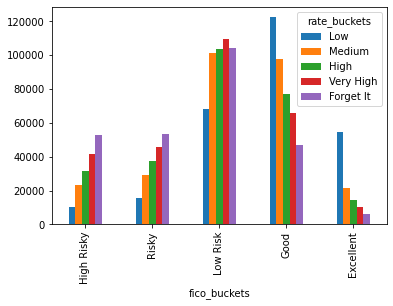

In [49]:
co_rate_ct = pd.crosstab(index=loan_int_df['fico_buckets'], columns=loan_int_df['rate_buckets'])
fico_rate_ct.plot.bar()


In [50]:
from scipy import stats
(chi2, p, dof, _) = stats.chi2_contingency([fico_rate_ct.iloc[0].values, fico_rate_ct.iloc[1].values, fico_rate_ct.iloc[2].values, fico_rate_ct.iloc[3].values, fico_rate_ct.iloc[4].values])
print('chi2 : ', chi2)
print('p-value : ',p)
print('Degree for Freedom : ', dof)

chi2 :  180703.58413092492
p-value :  0.0
Degree for Freedom :  16


In [51]:
import math
loan_int_df['fico_score'] = loan_int_df['last_fico_range_low'].apply(lambda x:int(math.ceil(x/10)*10))

d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,initial_list_status,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_buckets,rate_buckets,fico_score
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,Debt consolidation,5.91,0.0,675.0,679.0,1.0,30.0,2765.0,w,0.0,564.0,560.0,Individual,NaN,NaN,High Risky,Very High,560
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,Business,16.06,1.0,715.0,719.0,4.0,6.0,21470.0,w,0.0,699.0,695.0,Individual,NaN,NaN,Low Risk,High,700
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,NaN,10.78,0.0,695.0,699.0,0.0,NaN,7869.0,w,0.0,704.0,700.0,Joint App,71000.0,13.85,Low Risk,Medium,700
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,Major purchase,25.37,1.0,695.0,699.0,3.0,12.0,21929.0,w,0.0,704.0,700.0,Individual,NaN,NaN,Low Risk,Forget It,700
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,Debt consolidation,10.20,0.0,690.0,694.0,0.0,NaN,8822.0,w,0.0,759.0,755.0,Individual,NaN,NaN,Good,High,760


In [57]:
loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500     6473
510    14603
520    16468
530    17827
540    19576
550    19682
560    18985
570    17915
580    16402
590    14626
600    12907
610    11642
620    10272
630     8894
640     7549
650     6067
660     9070
670    10998
680     8336
690     6111
700     4274
710     3111
720     2160
730     1363
740      904
750      651
760      507
770      329
780      293
790      207
800      157
810      108
820       62
830       42
840       20
850        8
Name: fico_score, dtype: int64

In [58]:
default_df = pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts())

In [59]:
default_df = default_df.reset_index()

In [60]:
default_df.columns = ['fico_score', 'default_total']
default_df

,fico_score,default_total
0,550,19682
1,540,19576
2,560,18985
3,570,17915
4,530,17827
5,520,16468
6,580,16402
7,590,14626
8,510,14603
9,600,12907


In [62]:
# FINDING RELATION BETWEEN THESE 2 NOW

default_df[['fico_score', 'default_total']].corr()

,fico_score,default_total
fico_score,1.000000,-0.899658
default_total,-0.899658,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='default_total'>

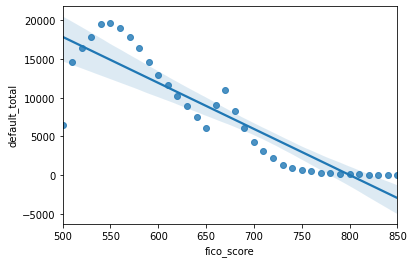

In [63]:
sns.regplot(x='fico_score', y='default_total', data=default_df)

In [66]:
default_df[['fico_score', 'default_total']].corr('spearman')

,fico_score,default_total
fico_score,1.00000,-0.93565
default_total,-0.93565,1.00000


# Pwlf : Piece wise linear regression function

**Piecewise is mostly not used by itself. Most of the regression techniques assumes independent variables to have a linear boundary. Piecewise can be used to break up non-linear pattern of data into breakpoints to create a linear interpretation or to be used to segment the key features that can be further used to fit individual models**

In [67]:
!pip install pwlf

  Created wheel for pwlf: filename=pwlf-2.0.4-py3-none-any.whl size=16147 sha256=9fb32c93ed06e6ef9e29b3d094f309136090f569fbd5b58ce36f4902d2cefe70
  Stored in directory: c:\users\abhishek maity\appdata\local\pip\cache\wheels\94\c2\70\5608feb79056cccbe70cbc3a6d48345479bdea4adf303dff12
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18182 sha256=c89b5896bce5bff504de5b2d1571222dfad72d2b5dceade31cc85fef7be2d67d
  Stored in directory: c:\users\abhishek maity\appdata\local\pip\cache\wheels\83\ce\8a\87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pwlf pyDOE


In [68]:
import pwlf

In [69]:
pwlf = pwlf.PiecewiseLinFit(default_df['fico_score'], default_df['default_total'])

In [72]:
pwise_model = pwlf.fit(4) # 4 is the no of segments

d:\anacondafiles\envs\deeplearning\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


In [75]:
pwlf.fit_breaks

array([500.        , 510.37401063, 540.19945928, 737.78362307,
       850.        ])

In [76]:
pwlf.slopes

array([813.00082606, 155.40266152, -95.41910914,  -7.24837259])

In [77]:
pwlf.intercepts

array([-400027.41331506,  -64406.40070025,   71087.38418328,
          6036.4587281 ])

In [78]:
y_hat_piecewise = pwlf.predict(default_df['fico_score'])

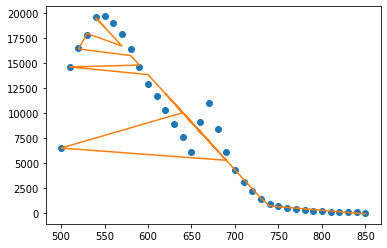

In [79]:
plt.figure()
plt.plot(default_df['fico_score'], default_df['default_total'], 'o')
plt.plot(default_df['fico_score'], y_hat_piecewise, '-')